<a href="https://colab.research.google.com/github/a01706447/TI3002C_AD22/blob/MONTY/Mapas_calor_MONTY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Evaluable: Mapas de calor y boxplots

Miembros del equipo ‘MONTY’: 

María Luisa Benítez Guerrero		A01706447

José Xavier Higuera Alanis 		A01204670

Maximiliano Aragón Fragoso		A01702063

Gerardo Sanchezbenitez Ballesteros	A01705306

In [ ]:
#!pip install seaborn
#!pip install plotly

import plotly
plotly.__version__
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import date, time, datetime, timedelta
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('TEMPXMLFILEDATA.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13,15,17,26,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,XMLFILEID,COMPANYID,BRANCHID,CUSTOMERID,DATE,INVOICETYPE,CREATEDTAXID,CREATEDBY,RECEIVEDTAXID,RECEIVEDBY,...,CREATEDDATE,DELETESTATUS,FILETYPE,AMOUNTPAID,ISPAYMENTPENDING,INVOICETYPE_INITIAL,PAYMETHODCODE,INVOICETYPE_INITIAL_ORIGINAL,XMLIEPSTAX,XMLCURRENCY
0,1,1000,1,2,2017-12-08 18:07:37,ingreso,GAHC840728IM3,Instituto Mexicano del Seguro Social,IMS421231I45,GARCIA HERRERA CARLOS ENRIQUE,...,2018-01-11 21:54:53.970000,False,P,NaN,NaN,i,NaN,NaN,NaN,NaN
1,2,1000,1,2,2017-12-01 13:41:25,egreso,GAHC840728IM3,CARLOS ENRIQUE *GARCIA HERRERA,HMI950125KG8,"HSBC MEXICO, S.A. INSTITUCION DE BANCA MULTIPL...",...,2018-01-11 21:54:54.100000,False,O,NaN,NaN,e,NaN,NaN,NaN,NaN
2,3,1000,1,2,2017-12-15 18:08:27,egreso,GAHC840728IM3,CARLOS ENRIQUE GARCIA HERRERA,CJL1011123Z6,"COMERCIALIZADORA JINKJET LASSER, S.A. DE C.V.",...,2018-01-11 21:54:54.120000,False,O,NaN,NaN,e,NaN,NaN,NaN,NaN
3,4,1000,1,2,2017-12-01 02:12:33,egreso,GAHC840728IM3,CARLOS ENRIQUE GARCIA HERRERA,HMI950125KG8,"HSBC MEXICO, S.A. INSTITUCION DE BANCA MULTIPL...",...,2018-01-11 21:54:54.270000,False,O,NaN,NaN,e,NaN,NaN,NaN,NaN
4,5,1000,1,2,2017-12-28 06:02:16,egreso,GAHC840728IM3,CARLOS ENRIQUE GARCIA HERRERA,OHN110509AE3,OPERADORA DE HOTELES NUALVA SA de CV,...,2018-01-11 21:54:54.443000,False,O,NaN,NaN,e,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161040 entries, 0 to 161039
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   XMLFILEID                     161040 non-null  int64  
 1   COMPANYID                     161040 non-null  int64  
 2   BRANCHID                      161040 non-null  int64  
 3   CUSTOMERID                    161040 non-null  int64  
 4   DATE                          161040 non-null  object 
 5   INVOICETYPE                   161040 non-null  object 
 6   CREATEDTAXID                  161040 non-null  object 
 7   CREATEDBY                     158575 non-null  object 
 8   RECEIVEDTAXID                 161040 non-null  object 
 9   RECEIVEDBY                    160236 non-null  object 
 10  PRODUCTDESC                   161040 non-null  object 
 11  TOTALTAXTRASADAS              141005 non-null  float64
 12  TOTALREGISTERTAX              61349 non-null

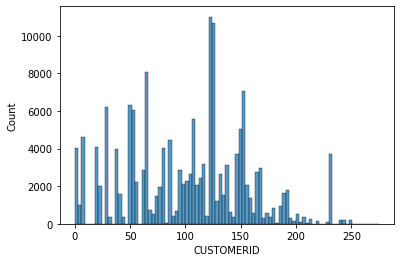

In [ ]:
sns.histplot(data=df, x='CUSTOMERID')

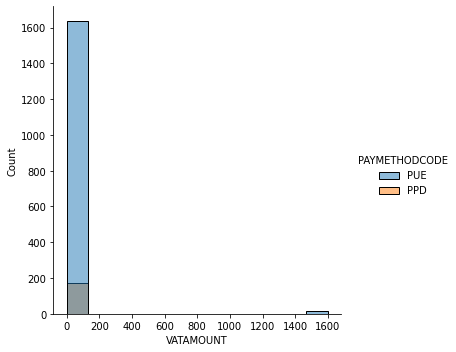

In [ ]:
data = df[df['CUSTOMERID']==125]

sns.displot(data=data, x='VATAMOUNT', hue='PAYMETHODCODE')

[Text(0.5, 1.0, 'BMI across multiple species/genders')]

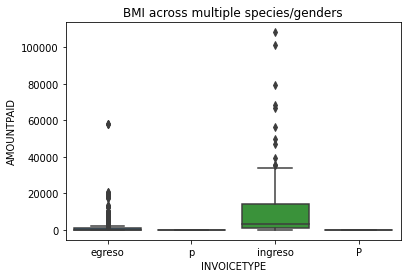

In [ ]:
sns.boxplot(data=data, y="AMOUNTPAID", x = 'INVOICETYPE').set(title='BMI across multiple species/genders')

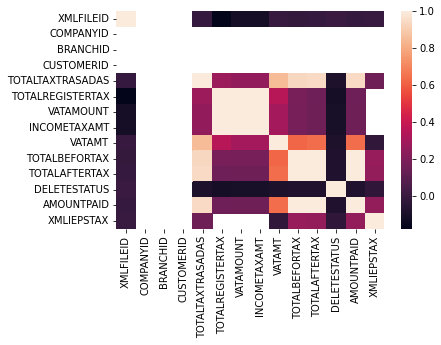

In [ ]:
sns.heatmap(data.corr())

Responde las siguientes preguntas:

¿Hay alguna variable que no aporta información?

R = Las variables que no aportan información son *COMPANYID* y *BRANCHID*

Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

R = Como mencionado anteriormente, *COMPANYID* y *BRANCHID* realmente no aportan información, por lo que podríamos quitarlas. datos como *INCOMETAX* y *XMLCURRENCY*, que tienen un porcentaje de valores no-nulos muy pequeño, quizá no aportarían mucho, por lo que podríamos eliminarlos.

¿Existen variables que tengan datos extraños?

R = Sí, existen variables como *AMOUNTPAID* que tienen valores atípicos, lo cual pudiera ser verdadero, pero igualmente podrían ser un error. También valores categóricos como *INVOICETYPE*, que deberían estar sólo separados en egreso e ingreso, pero tienen más categorías, como p y P.

Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

R = No, existen unos rangos distintos a otros, especialmente porque se trata de transacciones financieras, y como hay distintos clientes, cada uno tiene valores completamente distintos de cantidades que manejan.

¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

R = Sí, por ejemplo, *CREATEDTAXID* y *RECEIVEDTAXID* se refieren a un RFC, que es del mismo tipo, pero uno es del emisor y otro es del receptor. También por ejemplo, *TOTALAFTERTAX*, *TOTALBEFORETAX*, *VATAMOUNT*, entre otras variables, se refieren a cantidades de dinero, por lo que pueden ser comparables y se pueden realizar análisis entre ellos.
